<a href="https://colab.research.google.com/github/CodyByre/DS-Unit-1-Sprint-2-Statistics/blob/master/Copy_of_DS_Unit_1_Sprint_Challenge_2_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [105]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

--2020-06-01 03:51:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [application/x-httpd-php]
Saving to: ‘crx.data.1’

crx.data.1          100%[===================>]  31.46K  --.-KB/s    in 0.06s   

2020-06-01 03:51:46 (487 KB/s) - ‘crx.data.1’ saved [32218/32218]



In [0]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# might need
#from sklearn.model_selection import train_test_split 
#from sklearn.ensemble import RandomForestClassifier 
#from sklearn import metrics
#import pickle

In [0]:
col_head = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']

In [108]:
ca = pd.read_csv('crx.data', header=None, names=col_head, na_values='?')
print(ca.shape)
ca.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [0]:
#Appropraite shape

In [110]:
ca.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
#Missing values changed from '?' and found. Trouble removing. Will use nan_policy='omit'

In [112]:
ca.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [113]:
print(ca.head().T)

         0      1     2      3      4
A1       b      a     a      b      b
A2   30.83  58.67  24.5  27.83  20.17
A3       0   4.46   0.5   1.54  5.625
A4       u      u     u      u      u
A5       g      g     g      g      g
A6       w      q     q      w      w
A7       v      h     h      v      v
A8    1.25   3.04   1.5   3.75   1.71
A9       t      t     t      t      t
A10      t      t     f      t      f
A11      1      6     0      5      0
A12      f      f     f      t      f
A13      g      g     g      g      s
A14    202     43   280    100    120
A15      0    560   824      3      0
A16      +      +     +      +      +


In [114]:
ca['A2']

0      30.83
1      58.67
2      24.50
3      27.83
4      20.17
       ...  
685    21.08
686    22.67
687    25.25
688    17.92
689    35.00
Name: A2, Length: 690, dtype: float64

In [115]:
pd.to_numeric(ca['A2'])

0      30.83
1      58.67
2      24.50
3      27.83
4      20.17
       ...  
685    21.08
686    22.67
687    25.25
688    17.92
689    35.00
Name: A2, Length: 690, dtype: float64

In [116]:
pd.to_numeric(ca['A14'], downcast='integer')
#won't seem to convert to int. won't affect math


0      202.0
1       43.0
2      280.0
3      100.0
4      120.0
       ...  
685    260.0
686    200.0
687    200.0
688    280.0
689      0.0
Name: A14, Length: 690, dtype: float64

In [0]:
#Tried this and failed, so did above method.
#ca[1]= ca[1].astype(float) 
#ca[13]= ca[13].astype(int) 

#correct = ca.dtypes 
#print('Wrong Types/n', wrong, '\n')
#print('Correct Types/n', correct, '\n')



In [118]:
ca2 = ca.replace({'+':1,'-':0})
ca2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [119]:
pd.to_numeric(ca2['A16'])

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: A16, Length: 690, dtype: int64

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
import seaborn as sns

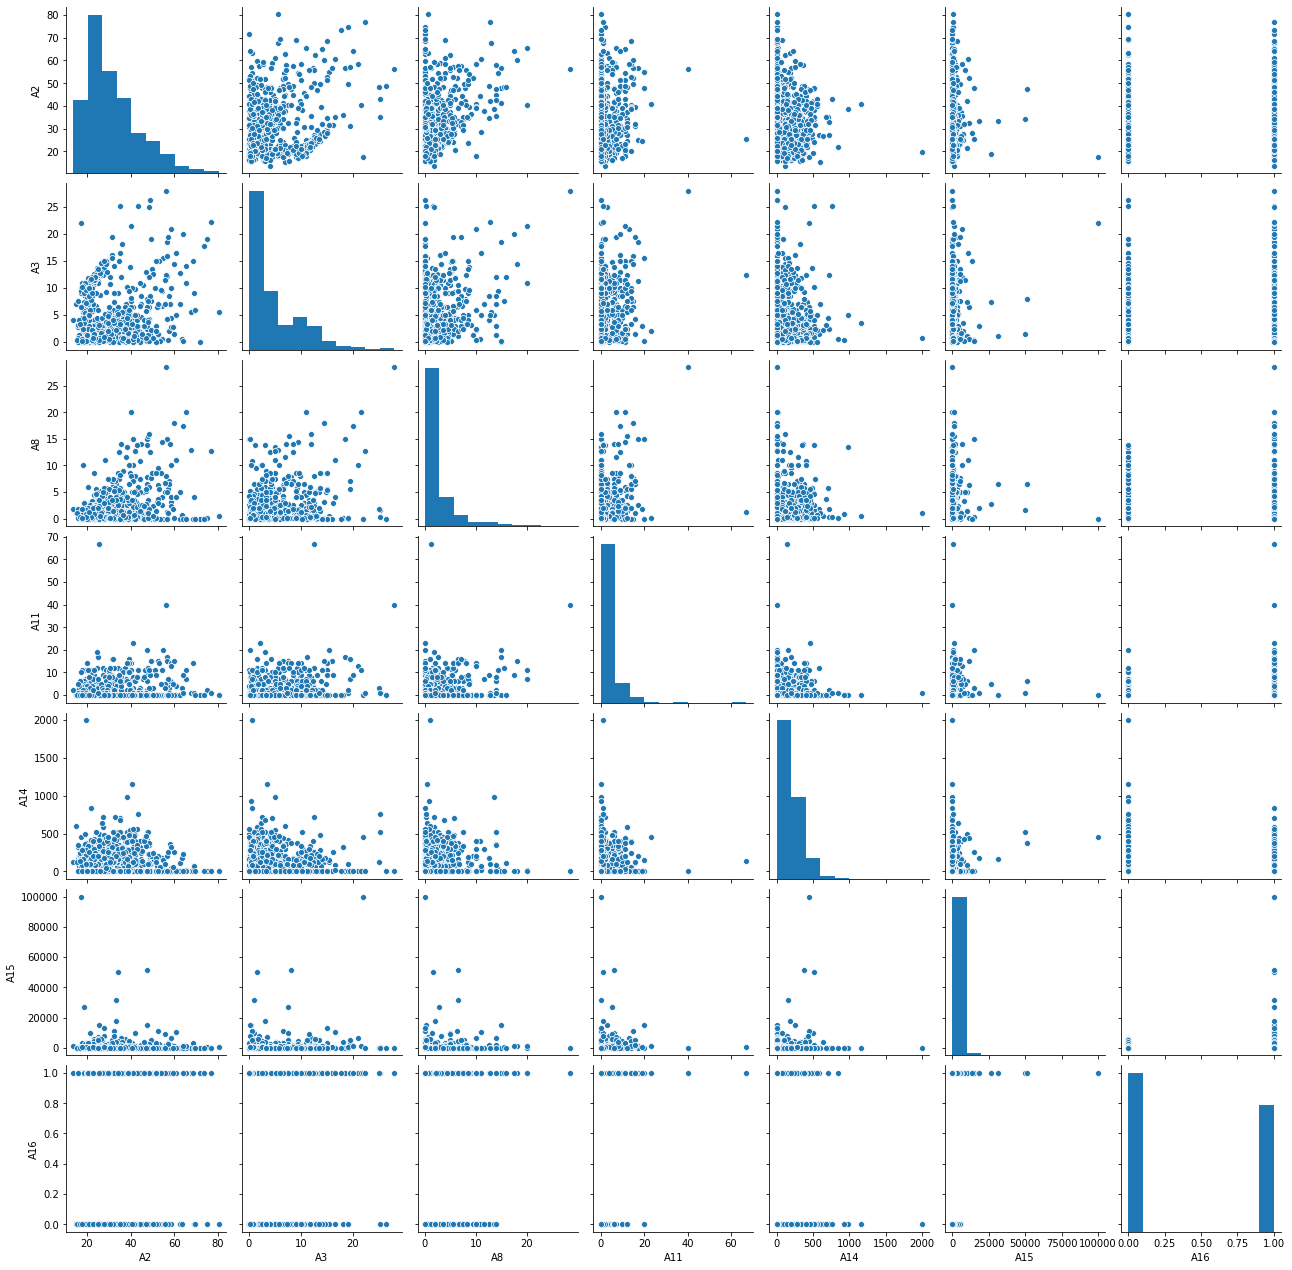

In [121]:
sns.pairplot(ca2)

In [122]:
ca2['A16'].value_counts()

0    383
1    307
Name: A16, dtype: int64

In [0]:
approved = ca2[ca2['A16']==1]
denied = ca2[ca2['A16']==0]



In [124]:
approved.corr()

,A2,A3,A8,A11,A14,A15,A16
A2,1.000000,0.242018,0.448193,0.188323,-0.126338,-0.011596,NaN
A3,0.242018,1.000000,0.379640,0.270734,-0.328795,0.110576,NaN
A8,0.448193,0.379640,1.000000,0.268358,-0.184369,-0.001367,NaN
A11,0.188323,0.270734,0.268358,1.000000,-0.121698,-0.009422,NaN
A14,-0.126338,-0.328795,-0.184369,-0.121698,1.000000,0.136104,NaN
A15,-0.011596,0.110576,-0.001367,-0.009422,0.136104,1.000000,NaN
A16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
denied.corr()

,A2,A3,A8,A11,A14,A15,A16
A2,1.000000,0.095026,0.247226,0.014088,-0.014918,-0.033869,NaN
A3,0.095026,1.000000,0.013675,0.082698,-0.105275,0.120923,NaN
A8,0.247226,0.013675,1.000000,0.003884,0.142298,-0.092774,NaN
A11,0.014088,0.082698,0.003884,1.000000,-0.059991,0.010720,NaN
A14,-0.014918,-0.105275,0.142298,-0.059991,1.000000,0.022729,NaN
A15,-0.033869,0.120923,-0.092774,0.010720,0.022729,1.000000,NaN
A16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is extremely different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.


In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel, chisquare, normaltest

In [127]:
#very different
ttest_ind(approved['A8'], denied['A8'])

Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)

In [128]:
#less different
ttest_ind(approved['A15'], denied['A15'])

Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)

For the categorical features, explore by creating "cross tabs" (aka contingency tables) between them and the class label, and apply the Chi-squared test to them. pandas.crosstab can create contingency tables, and scipy.stats.chi2_contingency can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

NOTE - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your main goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.


In [129]:
ca2.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16      int64
dtype: object

In [130]:
xtab = pd.crosstab(index= ca2['A16'], columns= [ca2['A1'],ca2['A4'],ca2['A5'],
                                                ca2['A6'],ca2['A7'],ca2['A9'],
                                                ca2['A10'],ca2['A12'],ca2['A13']], margins=True)
xtab

A1   a                                   ...  b                                All
A4   l  u                                ...  y                                   
A5  gg  g                                ...  p                                   
A6  cc aa                          c     ...  r  w                    x           
A7  ff  h     v                   bb  h  ...  n  h  v                 h     v     
A9   f  f  t  f        t           t  t  ...  f  t  f        t        f  t  t     
A10  f  f  f  f     t  f     t     t  f  ...  f  f  f        f  t     f  f  t     
A12  t  f  f  f  t  t  f  t  f  t  t  f  ...  t  t  f     t  t  f  t  f  t  t     
A13  s  g  g  g  g  g  g  g  g  g  g  g  ...  g  g  g  s  g  g  g  g  g  g  g     
A16                                      ...                                      
0    0  1  1  4  1  2  0  0  0  0  0  0  ...  1  0  1  2  2  0  0  1  1  1  0  371
1    1  0  0  0  0  0  3  1  4  2  1  1  ...  0  1  0  0  0  3  2  2  0  0  2  300
All  1  1  1  4  1  2  3  1  4  2  1  1  ...  1  1  1  2  2  3  2  3  1  1  2  671

[3 rows x 354 columns]

In [0]:
columns= [ca2['A1'],ca2['A4'],ca2['A5'],ca2['A6'],ca2['A7'],ca2['A9'],ca2['A10'],
          ca2['A12'],ca2['A13']]
xtab_list = [pd.crosstab(ca2['A16'], x) for x in columns]


In [0]:
columns= [ca2['A1'],ca2['A4'],ca2['A5'],ca2['A6'],ca2['A7'],ca2['A9'],ca2['A10'],
          ca2['A12'],ca2['A13']]

In [133]:
xtab_list

[A1     a    b
 A16          
 0    112  262
 1     98  206, A4   l    u    y
 A16             
 0    0  263  118
 1    2  256   45, A5     g  gg    p
 A16              
 0    263   0  118
 1    256   2   45, A6   aa   c  cc   d   e  ff   i  j   k   m   q  r   w   x
 A16                                                      
 0    35  75  12  23  11  46  45  7  37  22  27  1  31   6
 1    19  62  29   7  14   7  14  3  14  16  51  2  33  32, A7   bb  dd  ff   h  j  n  o    v  z
 A16                                 
 0    34   4  49  51  5  2  1  230  2
 1    25   2   8  87  3  2  1  169  6, A9     f    t
 A16          
 0    306   77
 1     23  284, A10    f    t
 A16          
 0    297   86
 1     98  209, A12    f    t
 A16          
 0    213  170
 1    161  146, A13    g  p   s
 A16            
 0    338  3  42
 1    287  5  15]

In [0]:
#for crosstab in xtab_list:


In [134]:
chisquare(xtab, axis=None)

Power_divergenceResult(statistic=267154.21460506704, pvalue=0.0)

In [0]:
xtab2 = pd.crosstab(ca2['A16'], ca2['A1'])

In [136]:
chisquare(xtab2, axis=None) #less extreme

Power_divergenceResult(statistic=108.00589970501476, pvalue=2.9474557158762434e-23)

In [0]:
xtab3 = pd.crosstab(ca2['A16'], ca2['A13'])

In [140]:
chisquare(xtab3, axis=None) #extreme

Power_divergenceResult(statistic=1037.2695652173913, pvalue=5.124924990548949e-222)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*

## Part 4 - Bayesian vs Frequentist Statistics

Using a minimum of 2-3 sentences, give an explanation of Bayesian and Frequentist statistics, and then compare and contrast these two approaches to statistical inference.



Bayesian statistics uses prior data before beginning. This can be based on logic, common sense, or actual data. The prior is then updated to improve results as you go.

Frequentist starts with a fresh clean slate and then comes to conclusions based on samples and data alone. Since there is no prior to begin with, there is no prior to update.

Bayesian is more logical to me because there is a knowledge base to take advantage of so we might as well use it.

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

## Part 4:

Give an extra awesome explanation of Bayesian vs Frequentist Statistics. Maybe use code or visualizations, or any other means necessary to show an above average grasp of these high level concepts.

In [0]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.